#  Introduction and Overview of Data Mining Process.


## Import required packages.

In [1]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model. 

%matplotlib inline 
import matplotlib.pylab as plt # for building and showing graphs.

Note that some imported packages use alias notations, to make the code more readable.

import <package> as <alias>

The aliases `np`, `pd`, and `plt` are commonly used in the data science community.


## Step 2:  Load the West Roxbury data set. 

In [2]:
# Create a deta frame in Python using WestRoxbury.csv file.
housing_df = pd.read_csv('WestRoxbury.csv')

In [3]:
# Determine and display dimensions of data frame. 
print('Number of rows and columns in data set:', 
      housing_df.shape )
# It has 5802 rows and 14 columns.

Number of rows and columns in data set: (5802, 14)


In [4]:
# Display the first 5 rows of the dataframe. 
housing_df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None


In [5]:
# Display the last five rows of the dataframe.
housing_df.tail()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,None
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,None
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,None
5801,447.6,5630,7406,1950,2510,1600,2.0,7,3,1,1,1,1,None


## Step 2: Sampling and oversampling data.

In [6]:
# Use the sample() function to retrieve a random sample of observations. 
# Here we sample 5 observations without replacement.
housing_df.sample(5)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
96,466.1,5863,8970,1999,2952,1872,2.0,7,4,2,1,1,1,None
4438,416.2,5235,4440,1935,3074,1832,2.0,8,4,2,0,1,0,None
5608,339.8,4274,6000,1955,2067,1304,2.0,6,3,1,1,1,1,None
1799,493.5,6208,6362,1989,3612,2798,2.0,8,3,2,1,1,1,None
4110,392.5,4937,6325,1925,3717,1964,1.5,9,5,2,0,1,1,None


In [7]:
# The sample() function allows to specify weights for the individual rows. 
# Use this to oversample houses with records that have over 10 rooms.
weights = [0.9 if rooms > 10 else 0.01 for rooms in housing_df.ROOMS]
housing_df.sample(10, weights=weights)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
2156,666.3,8382,13269,1925,5933,3726,2.0,12,4,2,1,1,1,Recent
227,305.4,3841,6291,1960,2126,1380,2.0,6,3,1,1,1,0,None
2622,739.7,9305,14475,1930,6733,3714,2.0,11,4,2,2,1,2,Recent
4013,329.1,4140,7336,1920,2792,1279,1.0,6,3,1,0,1,1,Recent
2237,634.7,7984,5564,1920,4500,2610,2.0,11,6,1,1,1,1,Old
5034,736.7,9267,13960,1880,5358,3452,2.5,12,5,4,0,2,1,Old
5045,385.2,4845,5632,1925,2530,1634,2.0,7,3,1,0,1,1,None
4603,742.4,9339,12600,1884,6224,3298,2.0,11,7,2,1,1,2,Recent
4490,632.6,7958,8520,1915,4373,2469,2.0,12,6,2,1,1,1,Recent
3182,718.2,9034,19180,1918,6565,3564,2.5,11,4,2,2,1,0,None


## Step 3: Data exploration, cleanup, and preprocessing.

In [8]:
# Display the column names.
print('Original column titles:')
housing_df.columns

Original column titles:


Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [9]:
# Note that some column titles above are with spaces and 
# some consist of two space-separated words.  
# It's more convenient to have column names which are single words. 

# In the rename() function you can specify individual columns 
# by name and provide their new name using a dictionary.
housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'})
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [10]:
# We therefore strip trailing spaces and replace the remaining spaces 
# with an underscore '_'. Instead of using the `rename` method, we 
# create a modified copy of `columns` and assign to the `columns` 
# field of the dataframe.
print('Modified column titles with no space and one word for titles:')
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]
housing_df.columns

Modified column titles with no space and one word for titles:


Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

## Step 3: Accessing subsets of the data.

### Pandas uses two methods to access a data frame; `loc` and `iloc`. 

In [11]:
# Display the first 4 rows of the data frame using loc command.
housing_df.loc[0:3] # for loc, the second index in the slice is inclusive.

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None


In [12]:
# Display the first 4 rows of the data frame using iloc command.
housing_df.iloc[0:4] # for iloc, the second index in the slice is exclusive.

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None


#### Note the difference in the two methods with respect to the slice notation! 
#### For consistency with how slices are defined in Python, we will use the `iloc` method mostly (but not always) from here on.

In [13]:
# Display the first 10 rows of the first column.
housing_df['TOTAL_VALUE'].iloc[0:10]

# This is an equivalent; the order is not important.
housing_df.iloc[0:10]['TOTAL_VALUE'] 

# This is another equivalent.
housing_df.iloc[0:10].TOTAL_VALUE 

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

In [14]:
# Display the 5th row of the first 10 columns. 
# The iloc methods allows specifying the rows and columns 
# within one set of brackets: dataframe.iloc[rows, columns].
housing_df.iloc[4][0:10]

# This is a simpler equivalent.
housing_df.iloc[4, 0:10] 

TOTAL_VALUE    331.5
TAX             4170
LOT_SQFT        5000
YR_BUILT        1910
GROSS_AREA      2370
LIVING_AREA     1438
FLOORS           2.0
ROOMS              7
BEDROOMS           3
FULL_BATH          2
Name: 4, dtype: object

In [15]:
# If prefer to preserve the data frame format, 
# use a slice for the 4th row [4:5, ...] as well.
housing_df.iloc[4:5, 0:10]

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2


In [16]:
# Use the pd.concat() function if you want to combine 
# non-consecutive columns into a new data frame. 
# The axis argument specifies the dimension along which 
# the concatenation happens, axis=0 for rows, axis=1 for columns.
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[4:6,4:6]], axis=1)

,TOTAL_VALUE,TAX,GROSS_AREA,LIVING_AREA
4,331.5,4170,2370,1438
5,337.4,4244,2124,1060


In [17]:
# To specify the 1st full column, use the : on its own.
housing_df.iloc[:,0:1]

,TOTAL_VALUE
0,344.2
1,412.6
2,330.1
3,498.6
4,331.5
...,...
5797,404.8
5798,407.9
5799,406.5
5800,308.7


In [18]:
# An often more practical way is to use 
# the column name 'TOTAL_VALUE" as follows.
housing_df['TOTAL_VALUE']

0       344.2
1       412.6
2       330.1
3       498.6
4       331.5
        ...  
5797    404.8
5798    407.9
5799    406.5
5800    308.7
5801    447.6
Name: TOTAL_VALUE, Length: 5802, dtype: float64

In [19]:
# Subset the column using a slice.
housing_df['TOTAL_VALUE'][0:10]

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

In [20]:
# Pandas provides a number of ways to access statistics of columns.

# Present number of rows in the data set.
print('Number of rows: ', len(housing_df['TOTAL_VALUE']))

# Present mean of the TOTAL_VALUE row.
print('Mean of TOTAL_VALUE: ', housing_df['TOTAL_VALUE'].mean())

Number of rows:  5802
Mean of TOTAL_VALUE:  392.6857149258877


In [21]:
# Use describe() to display a number of common
# statistics for the TOTAL_VALUE column.
housing_df['TOTAL_VALUE'].describe()

count    5802.000000
mean      392.685715
std        99.177414
min       105.000000
25%       325.125000
50%       375.900000
75%       438.775000
max      1217.800000
Name: TOTAL_VALUE, dtype: float64

In [22]:
# Use describe() function to display column statistics
# for the entire data set. 
np.round(housing_df.describe(), decimals=2)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
count,5802.00,5802.00,5802.00,5802.00,5802.00,5802.00,5802.00,5802.00,5802.00,5802.00,5802.00,5802.00,5802.00
mean,392.69,4939.49,6278.08,1936.74,2924.84,1657.07,1.68,6.99,3.23,1.30,0.61,1.02,0.74
std,99.18,1247.65,2669.71,35.99,883.98,540.46,0.44,1.44,0.85,0.52,0.53,0.12,0.57
min,105.00,1320.00,997.00,0.00,821.00,504.00,1.00,3.00,1.00,1.00,0.00,1.00,0.00
25%,325.12,4089.50,4772.00,1920.00,2347.00,1308.00,1.00,6.00,3.00,1.00,0.00,1.00,0.00
50%,375.90,4728.00,5683.00,1935.00,2700.00,1548.50,2.00,7.00,3.00,1.00,1.00,1.00,1.00
75%,438.78,5519.50,7022.25,1955.00,3239.00,1873.75,2.00,8.00,4.00,2.00,1.00,1.00,1.00
max,1217.80,15319.00,46411.00,2011.00,8154.00,5289.00,3.00,14.00,9.00,5.00,3.00,2.00,4.00


##  Step 3: Data set variables and change variable type. 

In [23]:
# Display column names.
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [24]:
# Display column data types. 
housing_df.dtypes

TOTAL_VALUE    float64
TAX              int64
LOT_SQFT         int64
YR_BUILT         int64
GROSS_AREA       int64
LIVING_AREA      int64
FLOORS         float64
ROOMS            int64
BEDROOMS         int64
FULL_BATH        int64
HALF_BATH        int64
KITCHEN          int64
FIREPLACE        int64
REMODEL         object
dtype: object

In [25]:
# The REMODEL column is 'object'; does not have 
# the 'category' definition.
print('Original REMODEL variable:')
print(housing_df.REMODEL.dtype)

# Need to change REMODEL variable type to 'category'. 
housing_df.REMODEL = housing_df.REMODEL.astype('category')

# Display category levels (classes) and category type.
print(' ')
print('Category levels and changed variable type:')
print(housing_df.REMODEL.cat.categories)  # It can take one of three levels.
print(housing_df.REMODEL.dtype)  # Type is now 'category'.

Original REMODEL variable:
object
 
Category levels and changed variable type:
Index(['None', 'Old', 'Recent'], dtype='object')
category


In [26]:
# Convert category variable REMODEL into dummy variables, 
# REMODEL_Old and REMODEL_Recent. 
# Use drop_first=True to drop the first dummy variable for 'None'.
housing_df = pd.get_dummies(housing_df, prefix_sep='_', 
                            drop_first=True)
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_Old', 'REMODEL_Recent'],
      dtype='object')

In [27]:
# Display values of the new dummy variables, 
# REMODEL_Old and REMODEL_Recent.
# If both dummy variables equal to 0, then REMODEL is 'None'.
print(housing_df.loc[:, 'REMODEL_Old':'REMODEL_Recent'].head(10))

   REMODEL_Old  REMODEL_Recent
0            0               0
1            0               1
2            0               0
3            0               0
4            0               0
5            1               0
6            0               0
7            0               0
8            0               1
9            0               0


## Step 3: Missing values' data procedures.

In [28]:
# Create a deta frame in Python using WestRoxbury.csv file.
housing_df_miss = pd.read_csv('WestRoxbury.csv')

# Determine and display dimensions of data frame. 
print('Number of rows and columns in data set:')
print(housing_df_miss.shape) # It has 5802 rows and 14 columns.

# Display original column names.
print()
print('Original column names:')
print(housing_df_miss.columns)

# Strip trailing spaces and replace the remaining spaces 
# with an underscore _. Instead of using the `rename` method, we 
# create a modified copy of `columns` and assign to the `columns` 
# field of the dataframe. 
# Display changed column names.
housing_df_miss.columns = [s.strip().replace(' ', '_') for s in housing_df_miss.columns]
print()
print('Updated column names:')
print(housing_df_miss.columns)

# Display number of rows before putting NA values in BEDROOMS 
# column.
print()
print('Number of rows with valid BEDROOMS values before:') 
print(housing_df_miss['BEDROOMS'].count()) 


Number of rows and columns in data set:
(5802, 14)

Original column names:
Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

Updated column names:
Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

Number of rows with valid BEDROOMS values before:
5802


In [29]:
# To illustrate missing data procedures, we first convert 
# a few entries for BEDROOMS column to NA's. 

# Create a sample of 10 rows from the data frame housing_df, for which
# missing values will be added in BEDROOMS column.
missingRows = housing_df_miss.sample(10).index

# Display rows, for which missing values will be added.
print('Sample rows for which missing values will be added:') 
print(missingRows)


Sample rows for which missing values will be added:
Int64Index([5380, 858, 3664, 4806, 5526, 5726, 2844, 974, 2673, 2033], dtype='int64')


In [30]:
# In 10-sample rows, put NAs (NaN) in the BEDROOMS column.
housing_df_miss.loc[missingRows, 'BEDROOMS'] = np.nan

# Display the number of rows with BEDROOM values (without NsN).
print('Number of rows with valid BEDROOMS values after setting to NaN: ', 
      housing_df_miss['BEDROOMS'].count()) 

Number of rows with valid BEDROOMS values after setting to NaN:  5792


In [31]:
# Remove rows with missing values.
reduced_df = housing_df_miss.dropna()

# Display number of rows after removing missing values. 
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  5792


In [32]:
# Impute missing values using the median of the 
# remaining values. By default, the median() function 
# of pandas dataframe ignores NA values. 

# Identify median of BEDROOMS column values 
# (NA values ignored).
medianBedrooms = housing_df_miss['BEDROOMS'].median()

# In BEDROOM column, fill (impute) the value 
# of median for NA (NaN) values.
housing_df_miss.BEDROOMS = housing_df.BEDROOMS.fillna(value=medianBedrooms)

# Display the number of rows with valid BEDROOM values 
#(no NAs) after imputation. 
print('Number of rows with valid BEDROOMS values after filling NaN values: ',
      housing_df_miss['BEDROOMS'].count())

Number of rows with valid BEDROOMS values after filling NaN values:  5802


## Step 6: Partition data. 

In [33]:
# Split the data set into training (60%) and validation (40%) sets. 
# Randomly sample 60% of the data set into a new data frame 
# 'trainData'. The remaining 40% serve as validation set, 
# 'validData'.

# Develop training set (partition).
# Random_state is set to a defined value to get the same partitions 
# when re-running the code.
trainData= housing_df.sample(frac=0.6, random_state=1)

# Assign and display rows that are not already in the training 
# set, into validation set, validData. 
validData = housing_df.drop(trainData.index)

print('Data paritions using Pandas')
print('Training  : ', trainData.shape)
print('Validation: ', validData.shape)

# Alternative way of partition using scikit-learn package.
# This approach, which is simpler, will be used in all Python 
# files to partition data.
print()
print('Data partitions using scikit-learn')
trainData, validData = train_test_split(housing_df, 
                    test_size=0.40, random_state=1)
print('Training  : ', trainData.shape)
print('Validation: ', validData.shape)

Data paritions using Pandas
Training  :  (3481, 15)
Validation:  (2321, 15)

Data partitions using scikit-learn
Training  :  (3481, 15)
Validation:  (2321, 15)


## Steps 7 and 8: Chooase DM technique (linear regression) and associated algorithm LinearRegression() for WestRoxbury example. 

In [34]:
# Data loading and preprocessing.

# Develop dataframe.
housing_df = pd.read_csv('WestRoxbury.csv') 

# Make column titles (variable names) as one word and 
# without blank. 
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns] 

# Develo dummy variables for categorical variables 
# (REMODEL_Old and REMODEL_Recent).
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)

# Exclude TOTAL_VALUE and TAX columns (variables) from predictors.
excludeColumns = ('TOTAL_VALUE', 'TAX')

# Develop predictor variables. 
predictors = [s for s in housing_df.columns if s not in excludeColumns]

# Develop outcome. 
outcome = 'TOTAL_VALUE'

# Partition data for X (predictors) and y (outcome). 
# The split is 60% for training parition set, and 40% for validation 
# parition set.
X = housing_df[predictors]
y = housing_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                        test_size=0.4, random_state=1)

# Using LinerRegression() function from scikit-learn, develop 
# linear regression model based on training set.
lin_model = LinearRegression()
lin_model.fit(train_X, train_y)

# Using the developed linear regression model, lin_model, predict values 
# in the training set. 
train_pred = lin_model.predict(train_X)
print('Actual, Predicted, and Residual Values for TOTAL_VALUE in Training Set')
print()
train_results = pd.DataFrame({
    'TOTAL_VALUE': train_y, 
    'Predicted': train_pred, 
    'Residual': train_y - train_pred
})
print(train_results.head())

Actual, Predicted, and Residual Values for TOTAL_VALUE in Training Set

      TOTAL_VALUE   Predicted   Residual
2024        392.0  387.726258   4.273742
5140        476.3  430.785540  45.514460
5259        367.4  384.042952 -16.642952
421         350.3  369.005551 -18.705551
1401        348.1  314.725722  33.374278


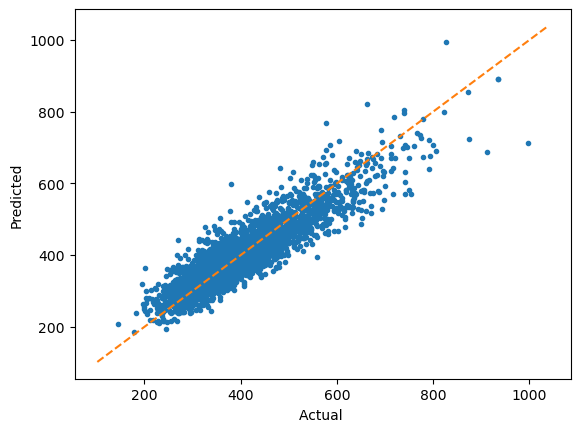

In [35]:
# Develop and display plot for actual and predicted values 
# of TOTAL_VALUE for training set.
plt.plot(train_results.TOTAL_VALUE, train_results.Predicted, '.')
plt.xlabel('Actual ')  # set x-axis label
plt.ylabel('Predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

In [36]:
# Using the developed linear regression model, lin_model, predict values 
# in the validation set. 
valid_pred = lin_model.predict(valid_X)
valid_results = pd.DataFrame({
    'TOTAL_VALUE': valid_y, 
    'Predicted': valid_pred, 
    'Residual': valid_y - valid_pred
})
print('Actual, Predicted, and Residual Values for TOTAL_VALUE in Validation Set')
print()
print(valid_results.head())

Actual, Predicted, and Residual Values for TOTAL_VALUE in Validation Set

      TOTAL_VALUE   Predicted   Residual
1822        462.0  406.946377  55.053623
1998        370.4  362.888928   7.511072
5126        407.4  390.287208  17.112792
808         316.1  382.470203 -66.370203
4034        393.2  434.334998 -41.134998


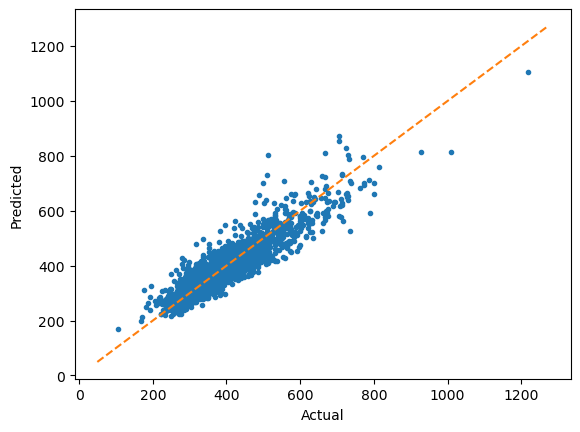

In [37]:
# Develop and display plot for validation set.
plt.plot(valid_results.TOTAL_VALUE, valid_results.Predicted, '.')
plt.xlabel('Actual')  # set x-axis label
plt.ylabel('Predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

## Step 8: Use accuracy perfomance metrics to assess the model's performance.

In [38]:
# Identify and display the metrics that scikit-learn provides.
print('Training set r2: ', np.round(r2_score(train_results.TOTAL_VALUE,
                            train_results.Predicted), decimals = 4))
print('Validation set r2: ', np.round(r2_score(valid_results.TOTAL_VALUE, 
                            valid_results.Predicted), decimals = 4))

Training set r2:  0.8097
Validation set r2:  0.8171


In [40]:
# !pip install dmba
# Import the utility function regressionSummary() for measuring 
# performance accuracy of the predictive technique (linear
# regression model). 
from dmba import regressionSummary

# Use and display regressionSummary() for training set.
print('Accuracy Performance Measures for Trainining Set')
regressionSummary(train_results.TOTAL_VALUE, train_results.Predicted)
print()

# Use and display regressionSummary() for validation set.
print('Accuracy Performance Measures for Validation Set')
regressionSummary(valid_results.TOTAL_VALUE, valid_results.Predicted)

  Obtaining dependency information for dmba from https://files.pythonhosted.org/packages/e5/ec/b58a6ea1bd4cd6ceb7d74718655a1beb777eefebcbf52d89cbab4fd9eb66/dmba-0.2.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.8 MB 6.8 MB/s eta 0:00:02
   - -------------------------------------- 0.3/11.8 MB 4.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.8 MB 6.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.5/11.8 MB 8.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.8 MB 10.2 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.8 MB 10.2 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.8 MB 10.2 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.8 MB 10.2 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/11.8 MB 5.8 MB/s eta 0:00:02
   ---------- --------------------------

## Step 10: Make predictions for new data records.

In [41]:
# Develop dataframe with 3 new records. 
# Notice that the TOTAL_VALUE response variable
# is not present in these records.
new_data = pd.DataFrame({
    'LOT_SQFT': [4200, 6444, 5035],
    'YR_BUILT': [1960, 1940, 1925],
    'GROSS_AREA': [2670, 2886, 3264],
    'LIVING_AREA': [1710, 1474, 1523],
    'FLOORS': [2.0, 1.5, 1.9],
    'ROOMS': [10, 6, 6],
    'BEDROOMS': [4, 3, 2],
    'FULL_BATH': [1, 1, 1],
    'HALF_BATH': [1, 1, 0],
    'KITCHEN': [1, 1, 1],
    'FIREPLACE': [1, 1, 0],
    'REMODEL_Old': [0, 0, 0],
    'REMODEL_Recent': [0, 0, 1],
})

# Display the 3 new records.
print(new_data)

# Display the prediction results of using the linear regression model
# for the 3 new records.
# Round prediction results by 3 decimals.
print('Predictions: ', np.round(lin_model.predict(new_data), decimals=3))

   LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  ROOMS  BEDROOMS  \
0      4200      1960        2670         1710     2.0     10         4   
1      6444      1940        2886         1474     1.5      6         3   
2      5035      1925        3264         1523     1.9      6         2   

   FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE  REMODEL_Old  REMODEL_Recent  
0          1          1        1          1            0               0  
1          1          1        1          1            0               0  
2          1          0        1          0            0               1  
Predictions:  [384.472 378.067 386.018]
